<a href="https://colab.research.google.com/github/AngelB26/Data-Analysis-Visualizations/blob/main/YOLOV_OBJECT_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue May 28 13:04:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.7/778.7 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

Install YOLOv8

In [2]:
from ultralytics import YOLO
import os
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.23 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [5]:
from IPython.display import display, Image

Train YOLOv8 Model on Custom Dataset

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZagewFW4MND9PLI8qPpp")
project = rf.workspace("angels-workspace").project("yolo_object_detection-7l1yu")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.23, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to YOLO_OBJECT_DETECTION-2 in yolov8:: 100%|██████████| 842/842 [00:00<00:00, 6294.22it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

Ultralytics YOLOv8.2.23 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/YOLO_OBJECT_DETECTION-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

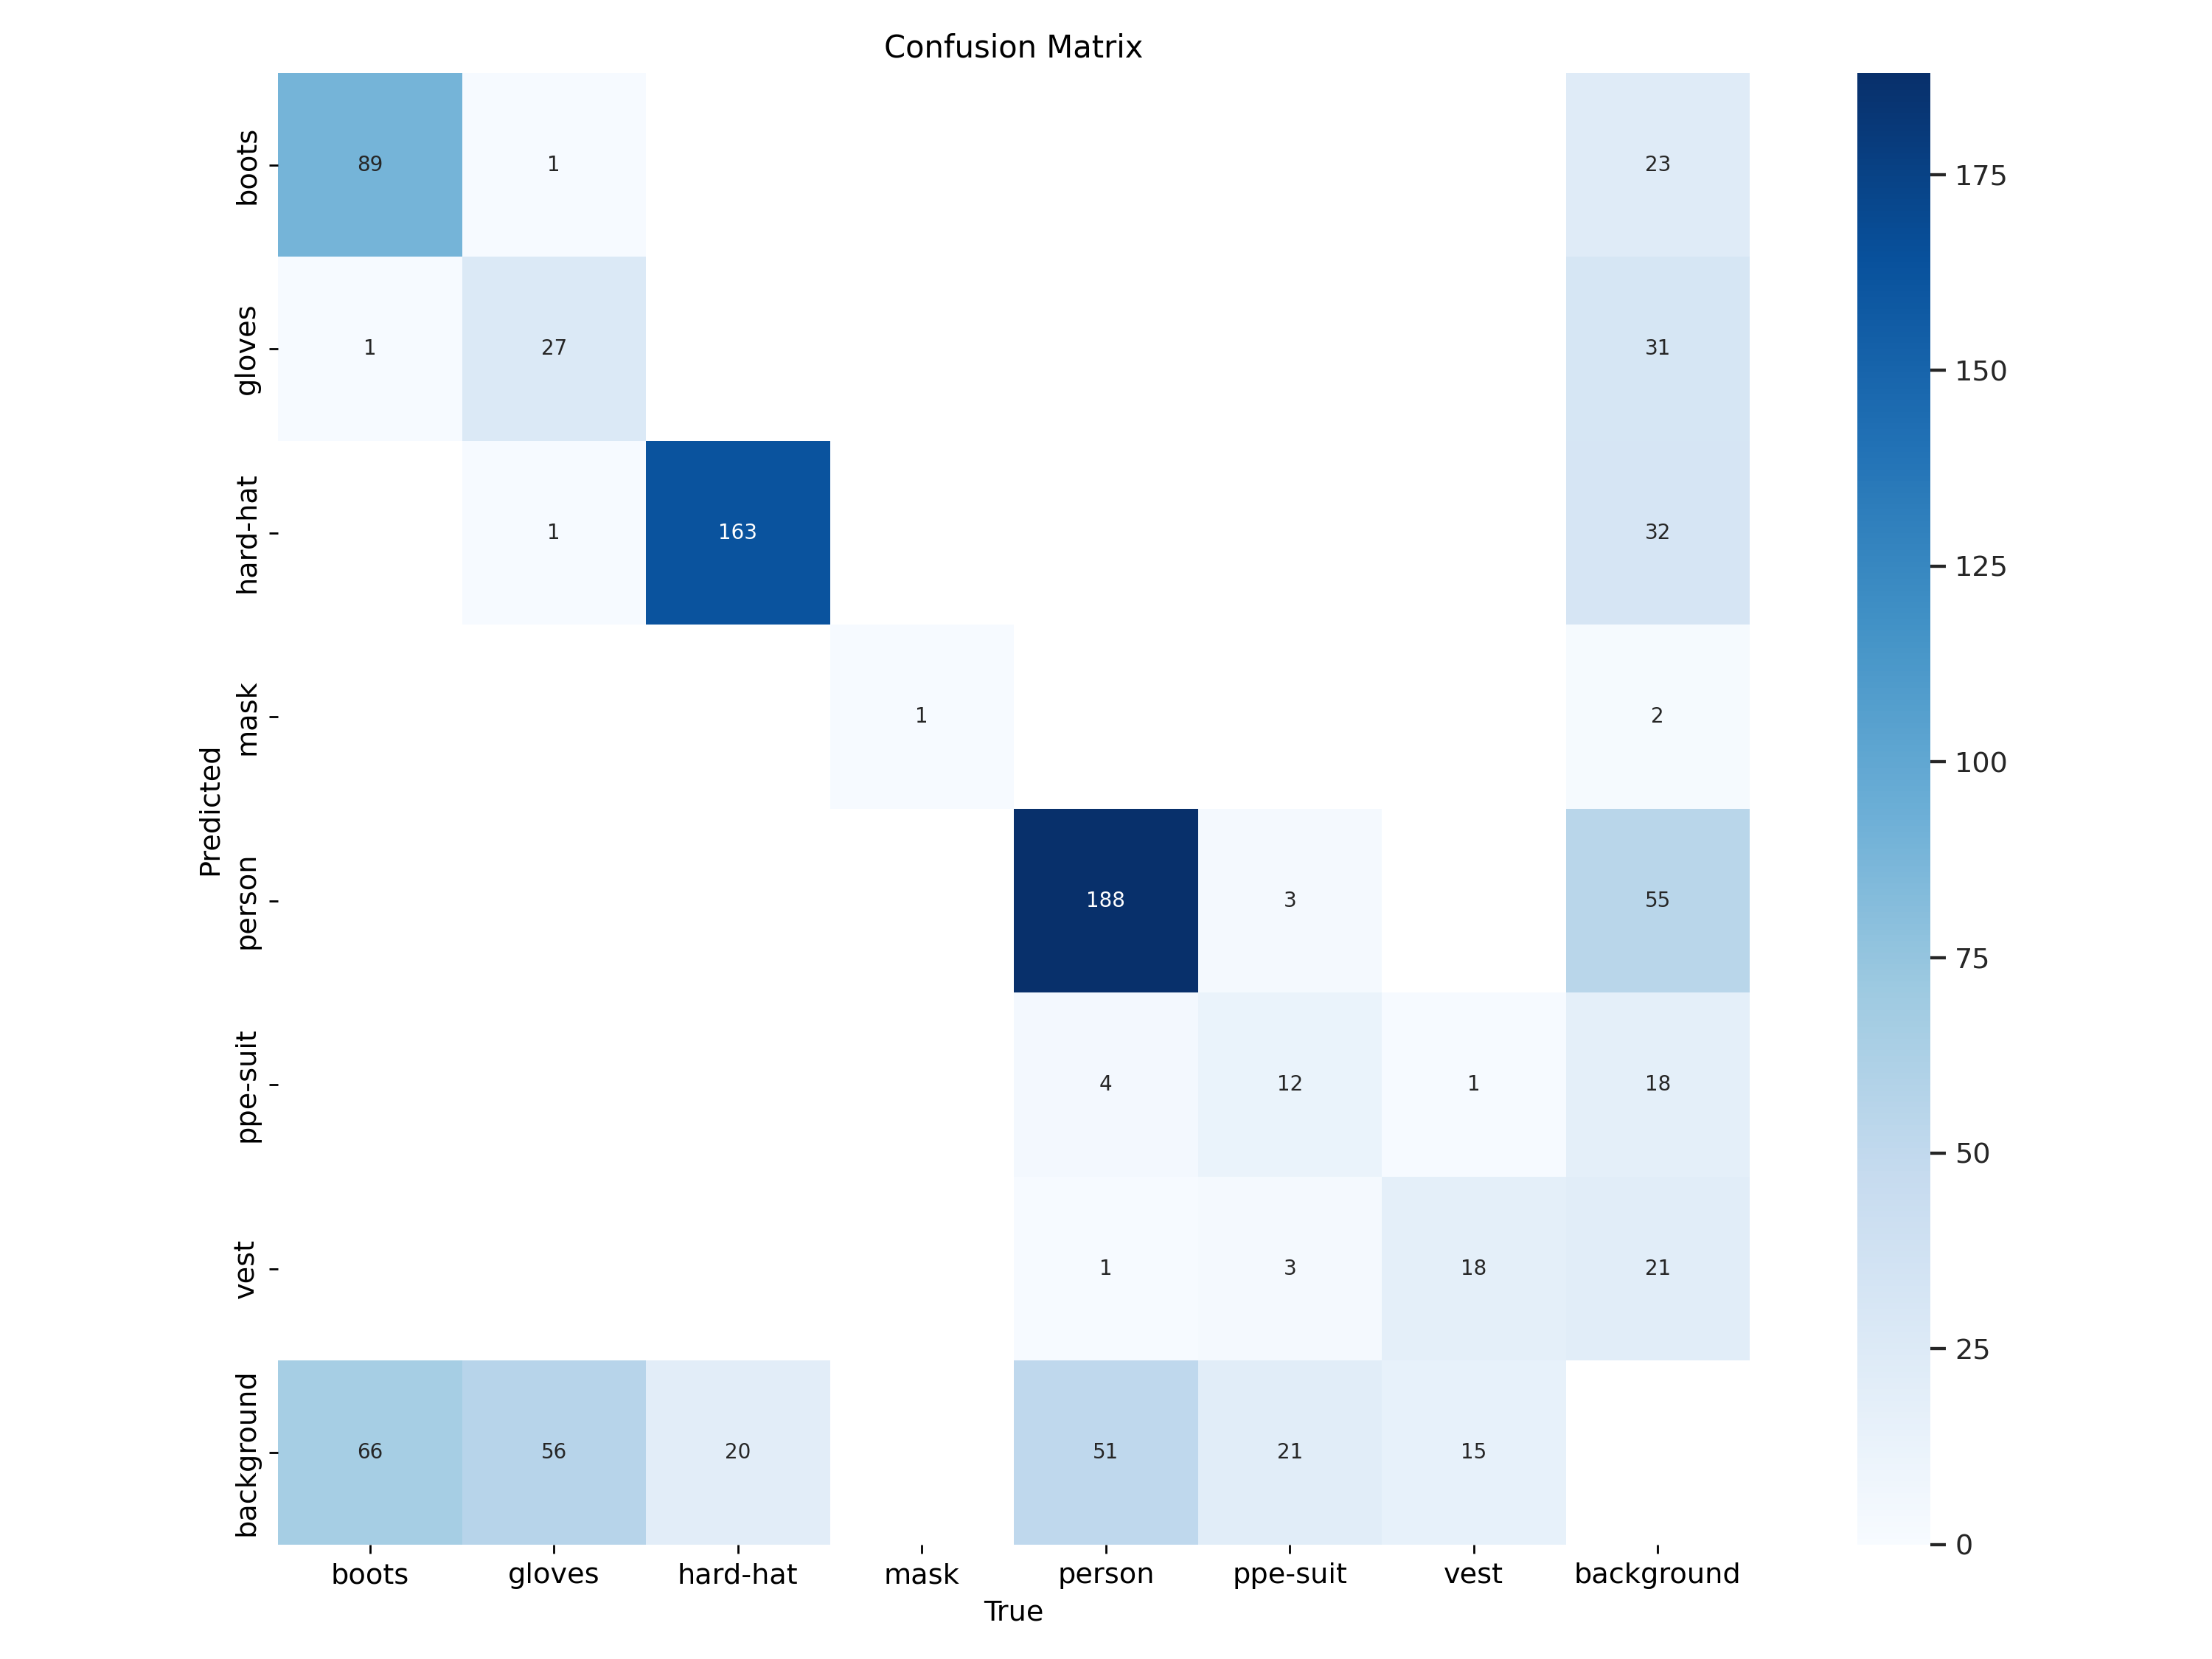

In [13]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png',width=600)

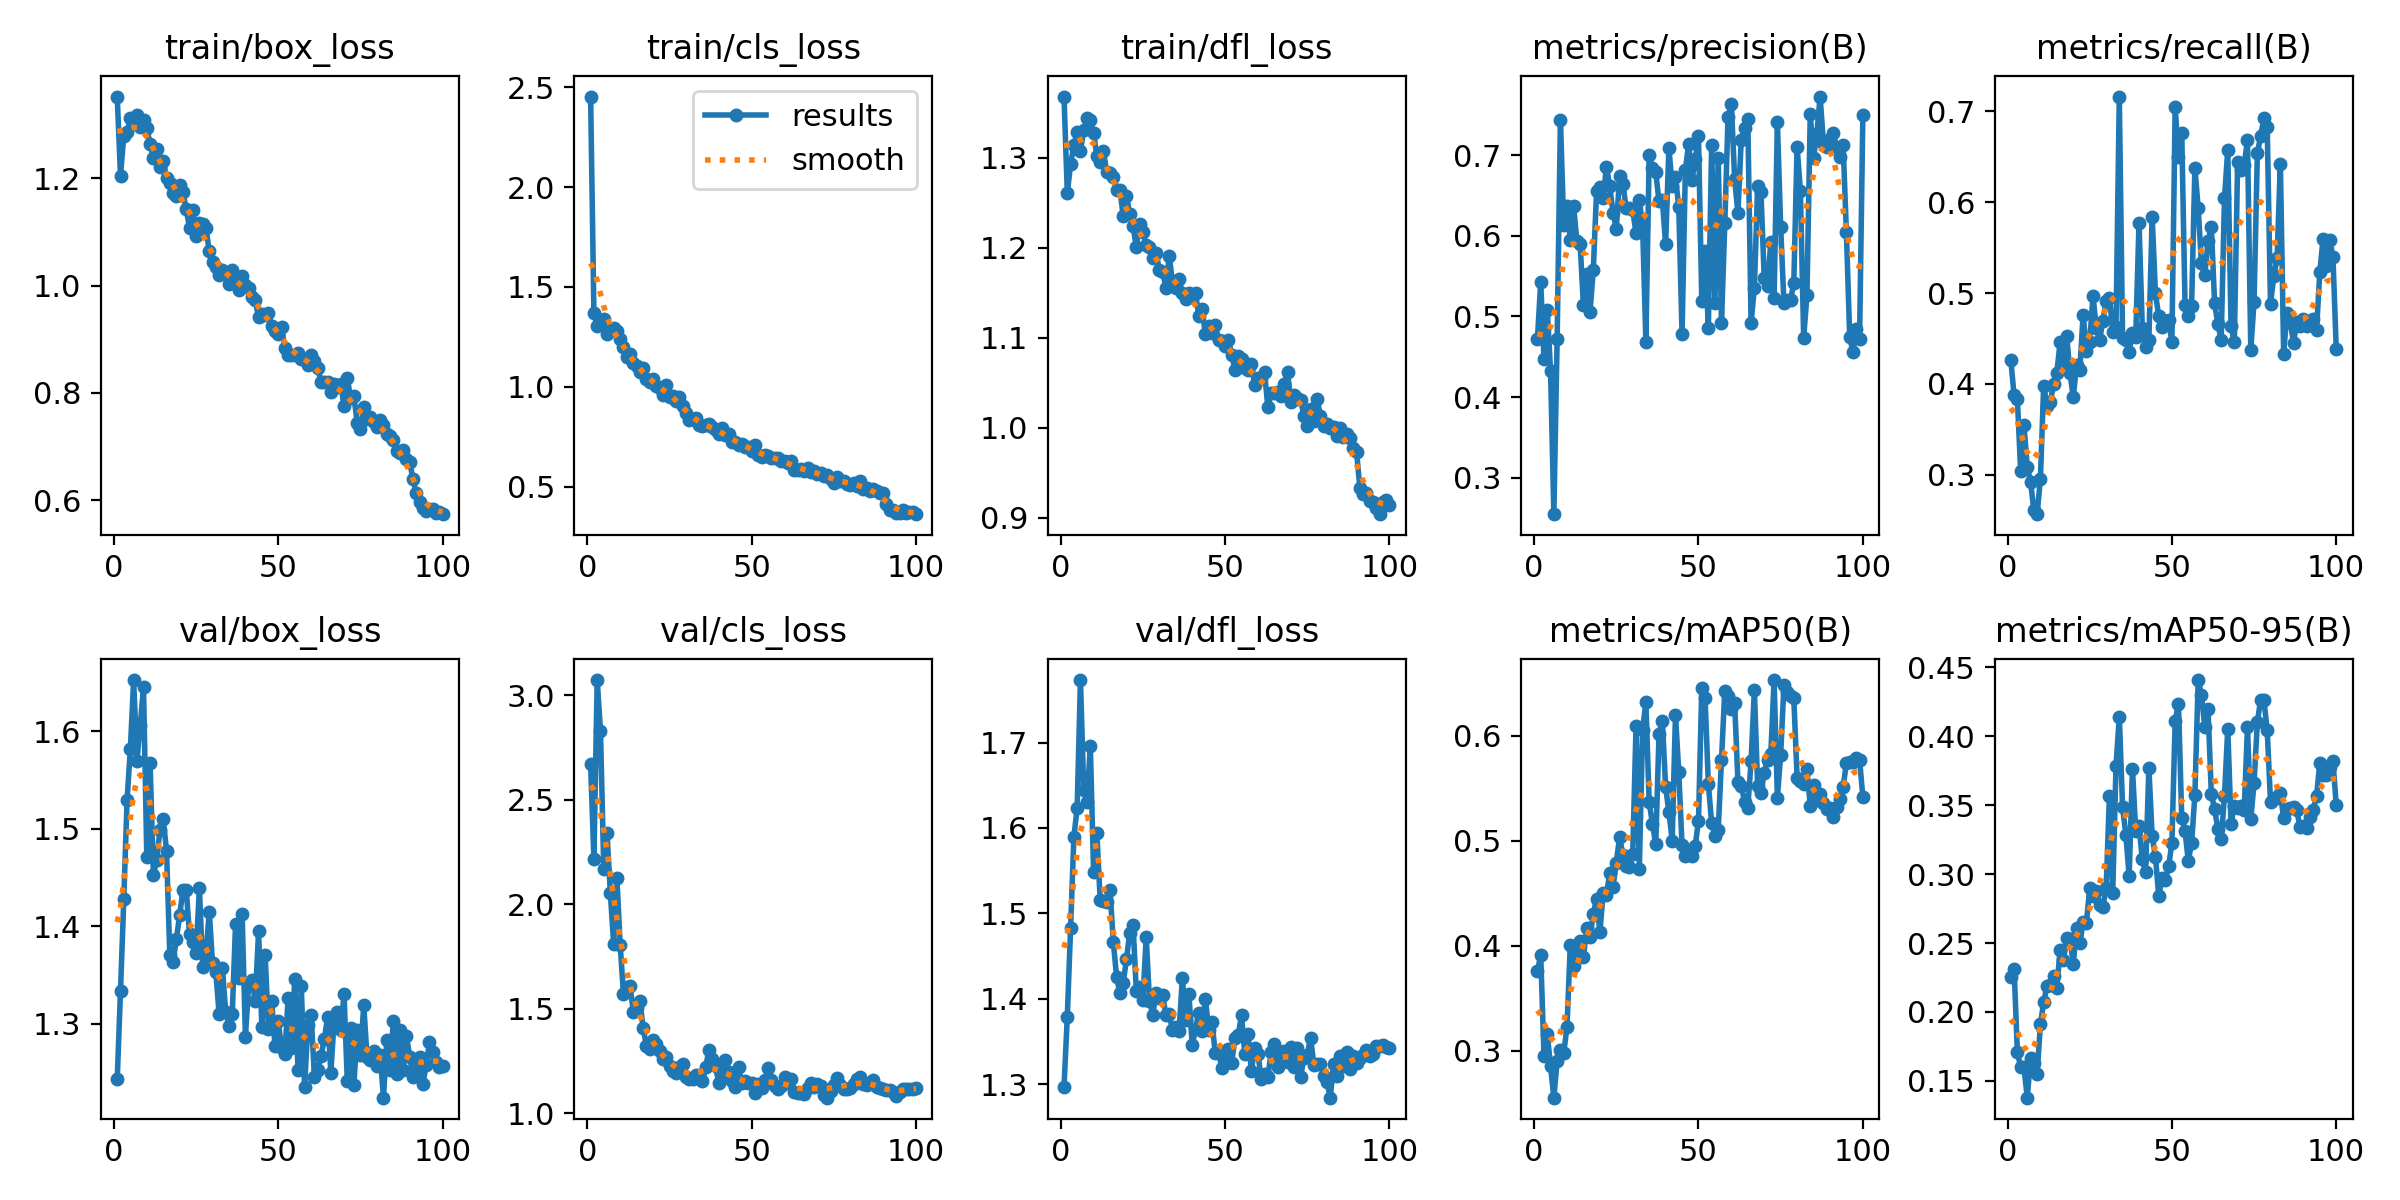

In [14]:
Image(filename=f'/content/runs/detect/train2/results.png',width=600)

In [16]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml


Ultralytics YOLOv8.2.23 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/YOLO_OBJECT_DETECTION-2/valid/labels.cache... 84 images, 1 backgrounds, 0 corrupt: 100% 84/84 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:11<00:00,  1.95s/it]
                   all         84        742      0.616      0.592      0.642      0.442
                 boots         84        156       0.83      0.499      0.636      0.279
                gloves         84         85      0.511      0.259      0.284       0.17
              hard-hat         84        183      0.846      0.869      0.901      0.661
                  mask         84          1      0.311          1      0.995      0.895
                person         84        244      0.807      0.775      0.837       0.61
              ppe-suit         84       

In [20]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/YOLO_OBJECT_DETECTION-2/test/images data={dataset.location}/data.yaml


Ultralytics YOLOv8.2.23 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs

image 1/40 /content/YOLO_OBJECT_DETECTION-2/test/images/-2180-_png_jpg.rf.f475057691c49d39eab1d3c672e42275.jpg: 640x640 4 bootss, 6 hard-hats, 6 persons, 37.1ms
image 2/40 /content/YOLO_OBJECT_DETECTION-2/test/images/-2398-_png_jpg.rf.db704c3a72cbadbdc8a51164a599f92c.jpg: 640x640 2 hard-hats, 2 persons, 2 ppe-suits, 37.1ms
image 3/40 /content/YOLO_OBJECT_DETECTION-2/test/images/001005_jpg.rf.8bd2a2c53ad455acc5b24d7d4c7b1332.jpg: 640x640 3 bootss, 2 hard-hats, 2 persons, 2 ppe-suits, 37.1ms
image 4/40 /content/YOLO_OBJECT_DETECTION-2/test/images/001059_jpg.rf.e815ad62d5621cfaccae8c45a538ef51.jpg: 640x640 4 hard-hats, 3 persons, 37.0ms
image 5/40 /content/YOLO_OBJECT_DETECTION-2/test/images/001073_jpg.rf.03f218fc65787f0e8e4a361a262b3c82.jpg: 640x640 2 hard-hats, 37.0ms
image 6/40 /content/YOLO_OBJECT_DETECTION-2/test/imag

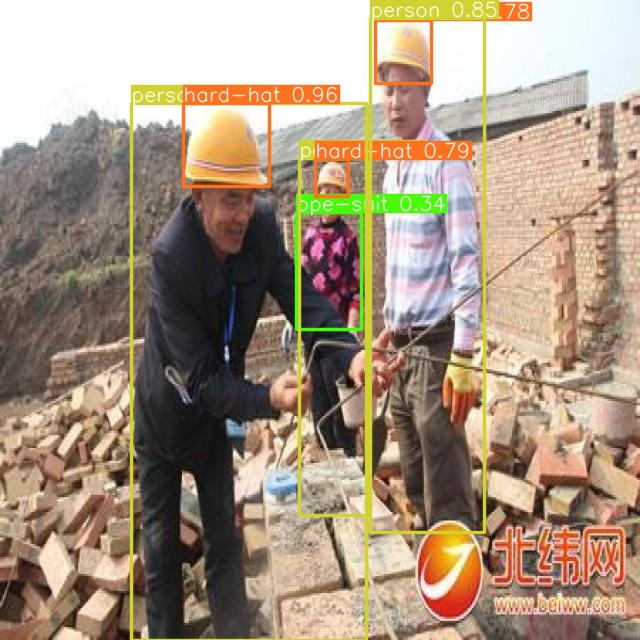

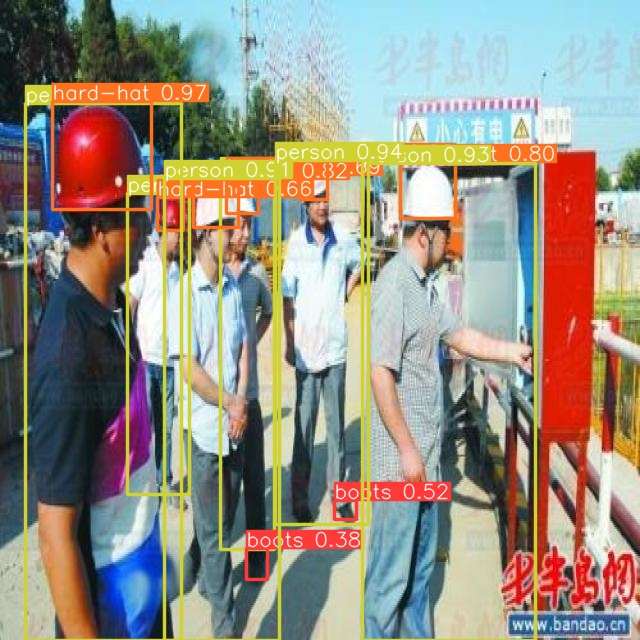

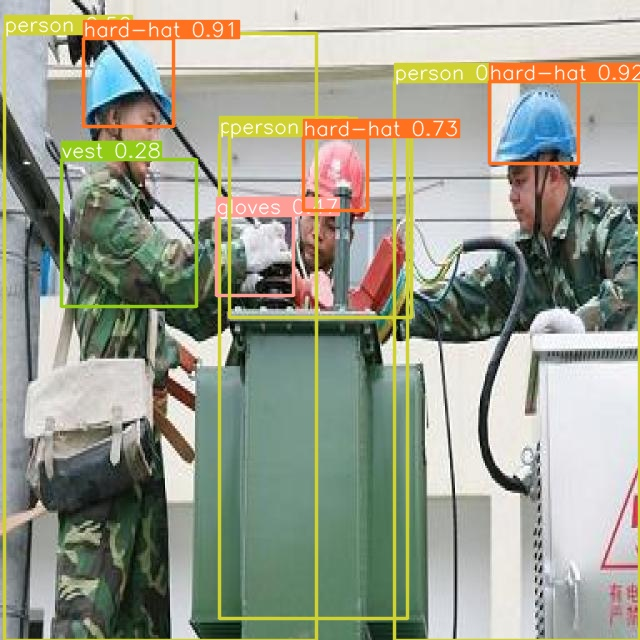

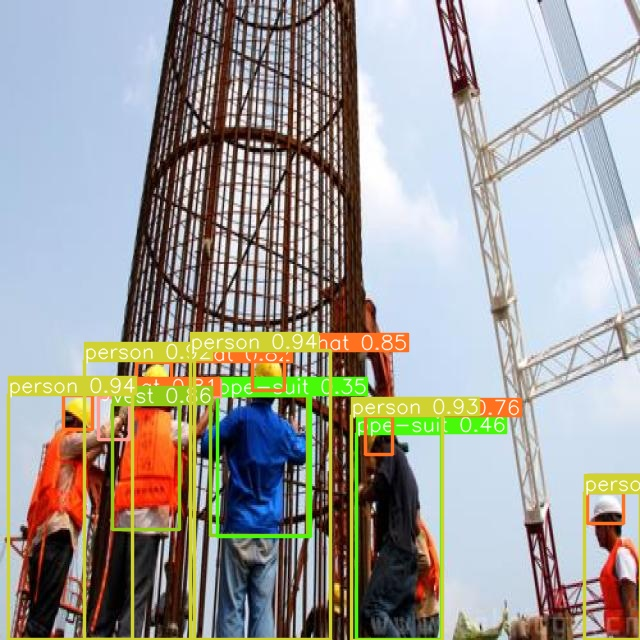

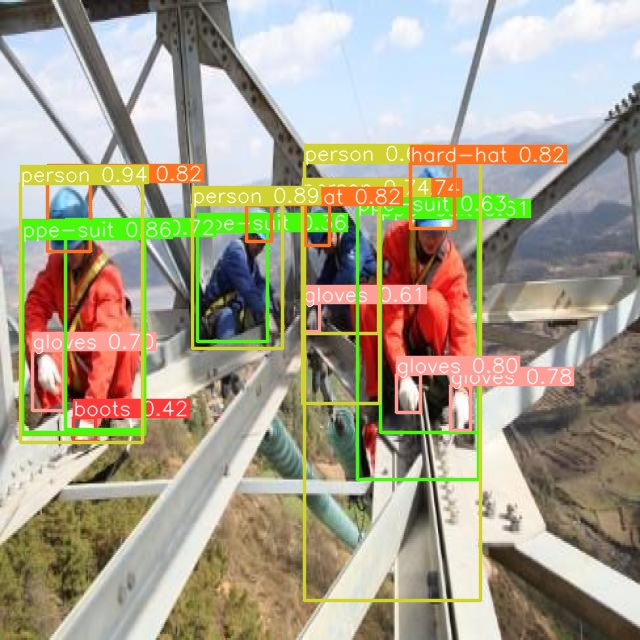

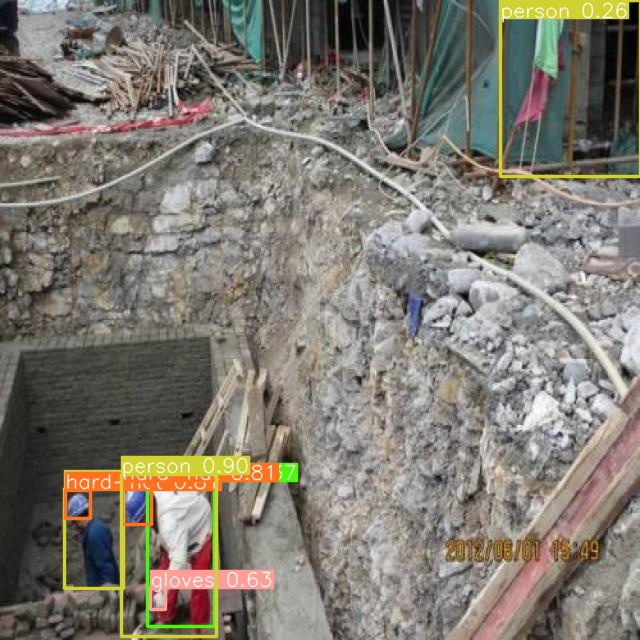

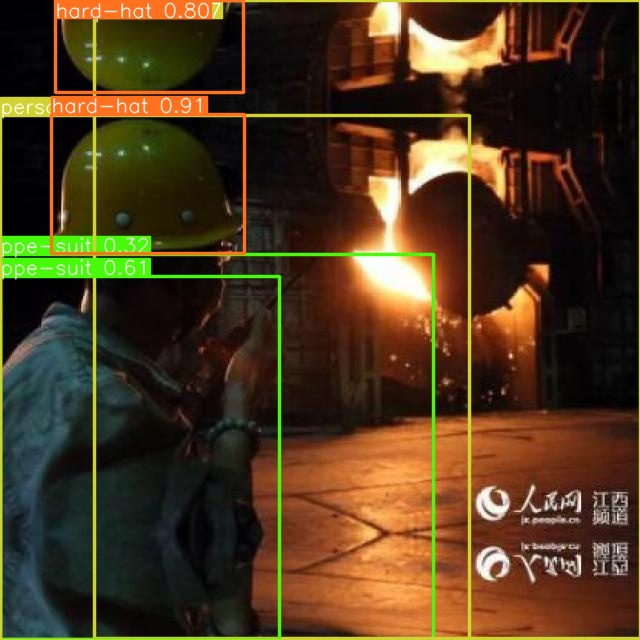

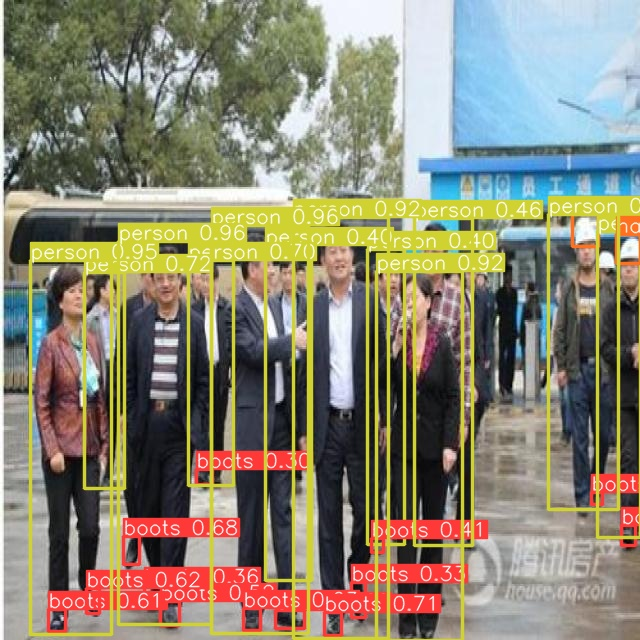

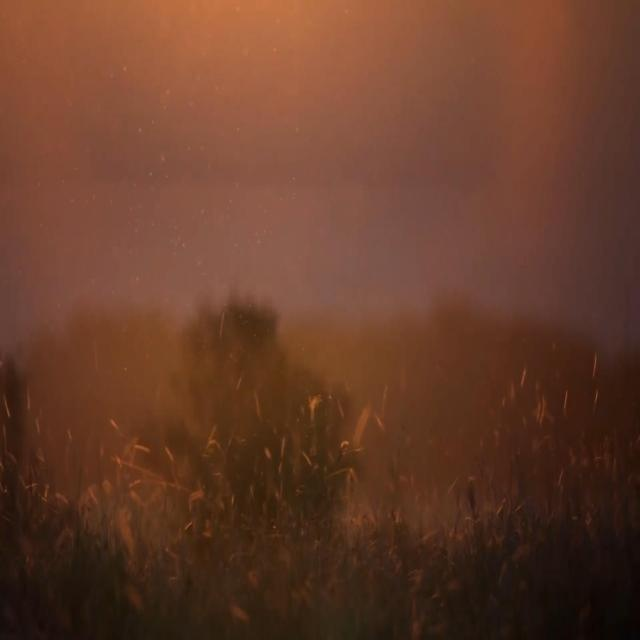

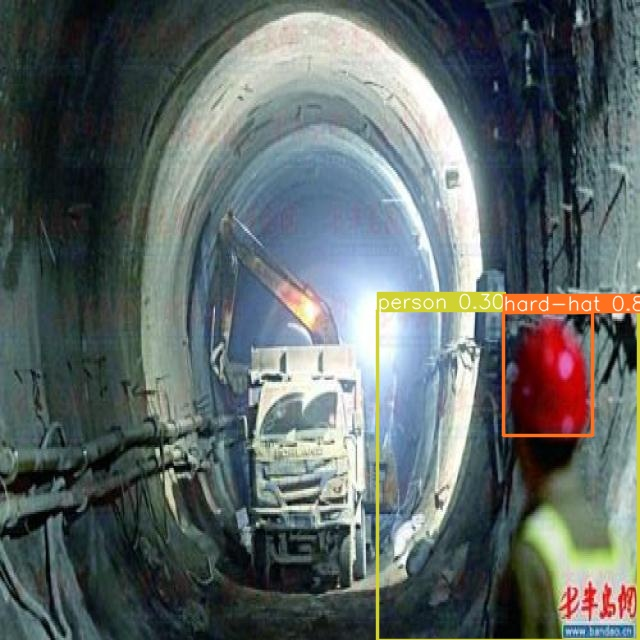

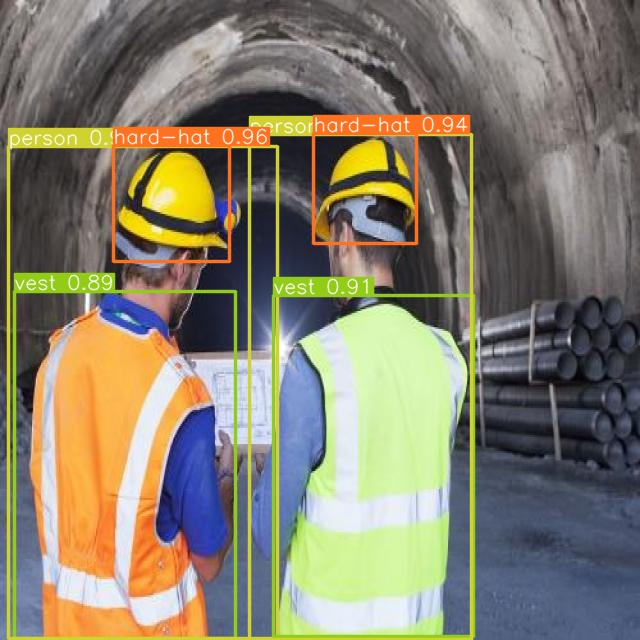

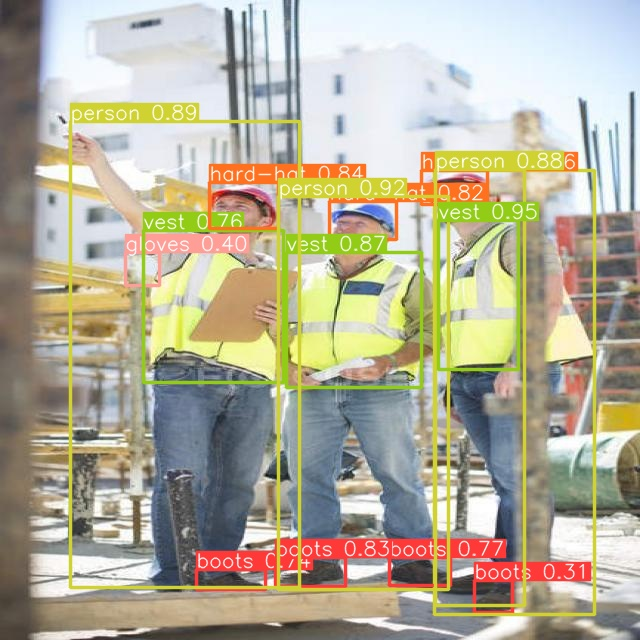

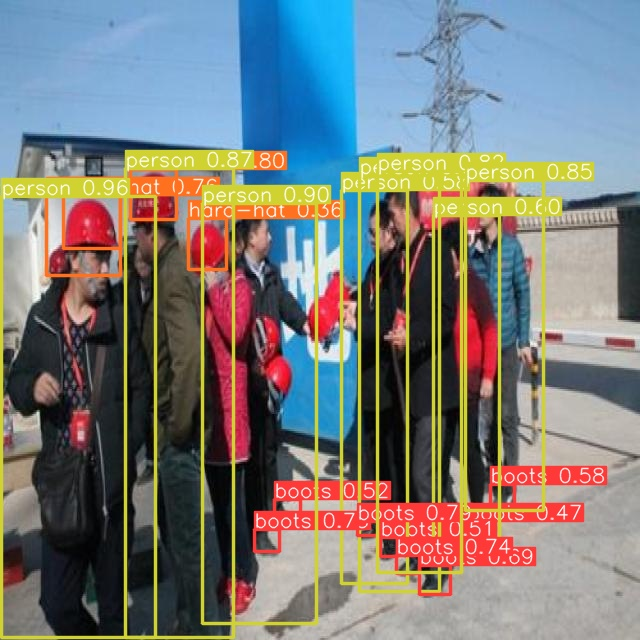

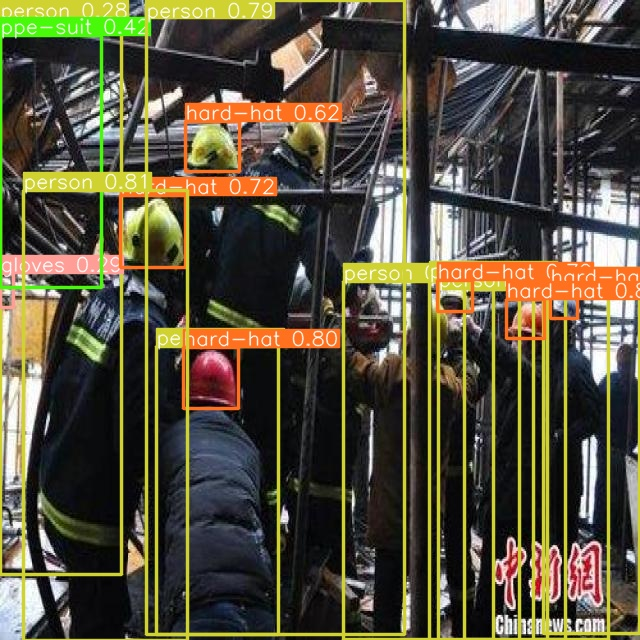

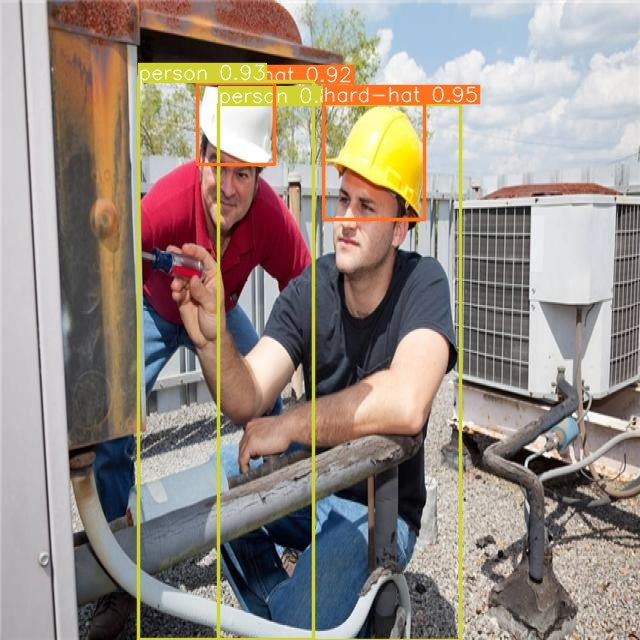

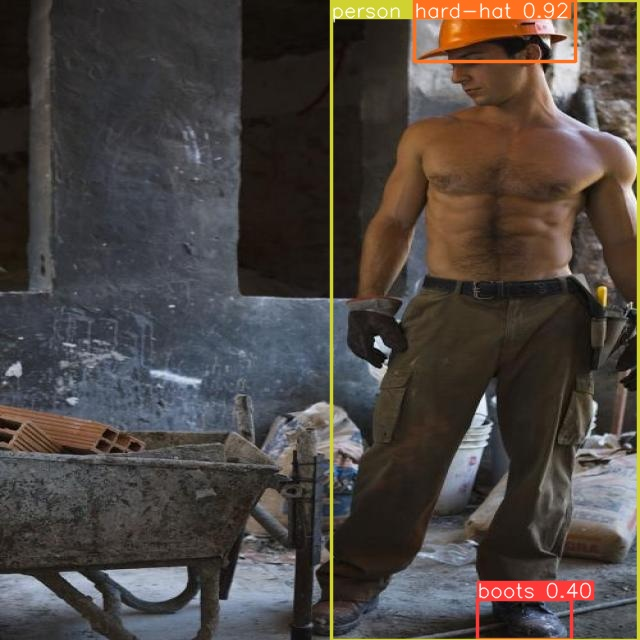

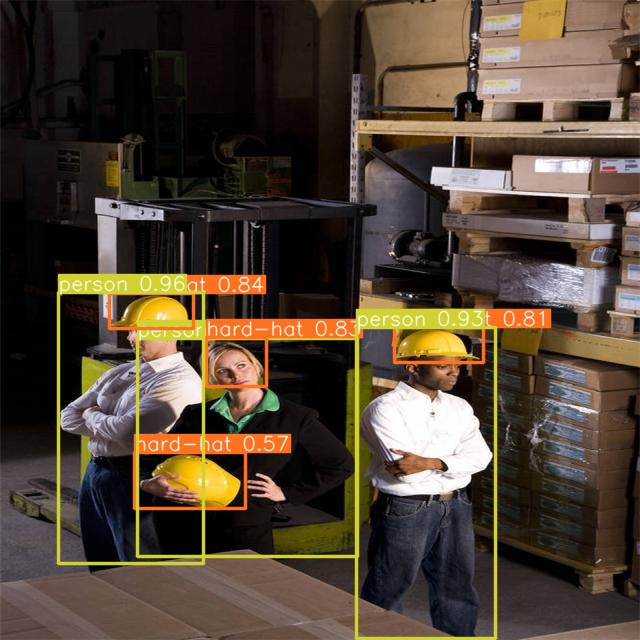

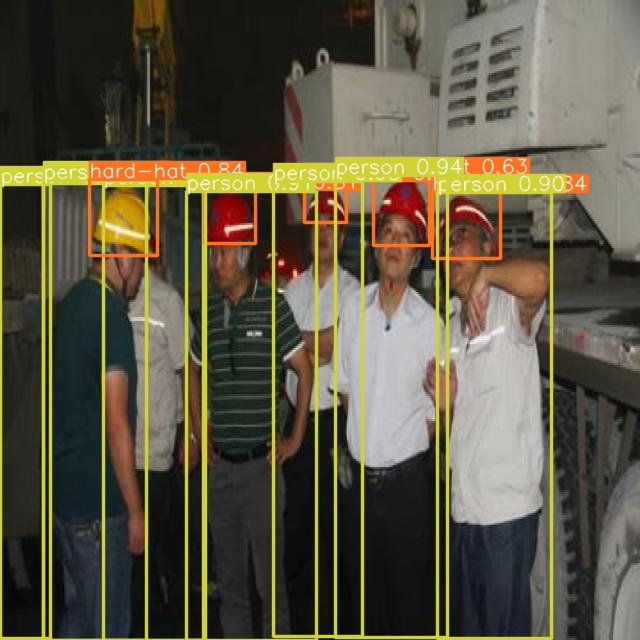

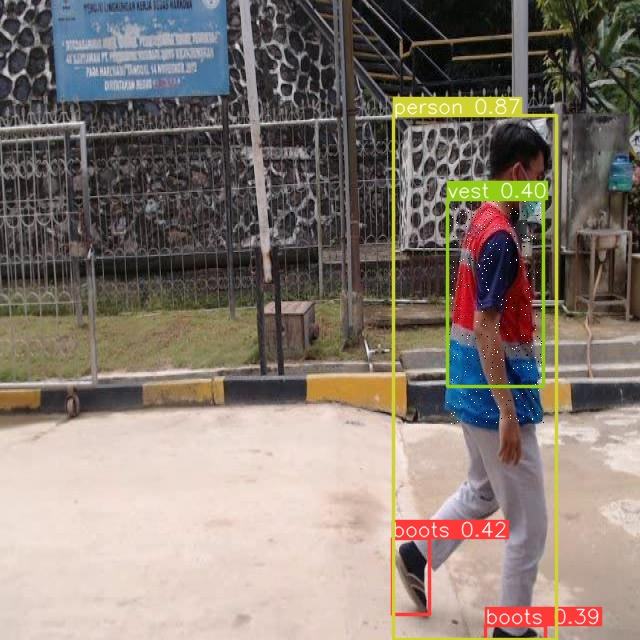

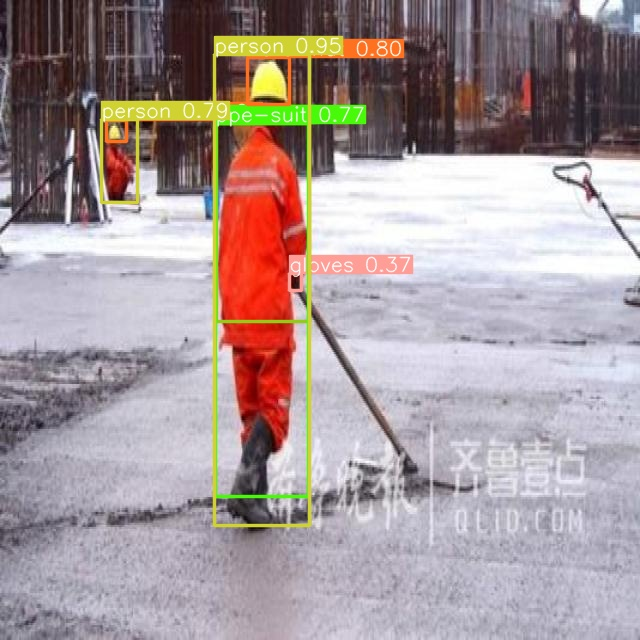

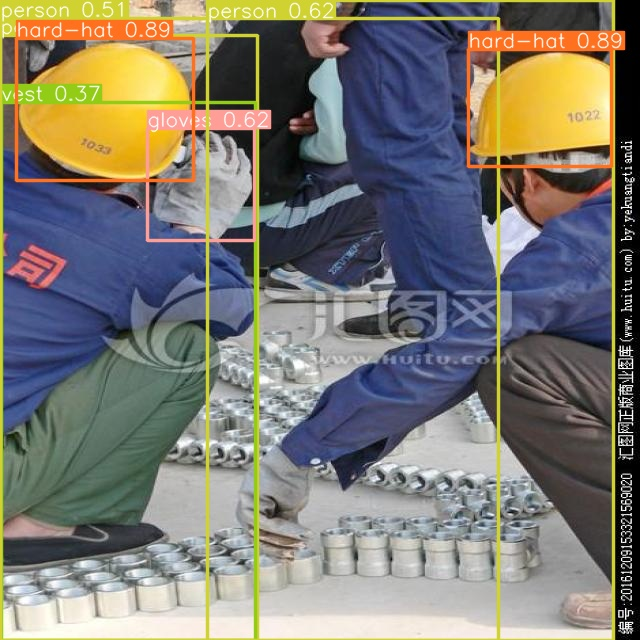

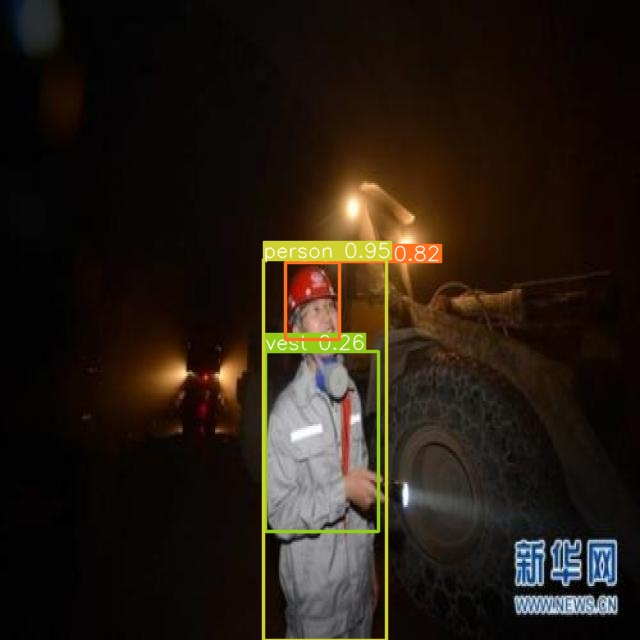

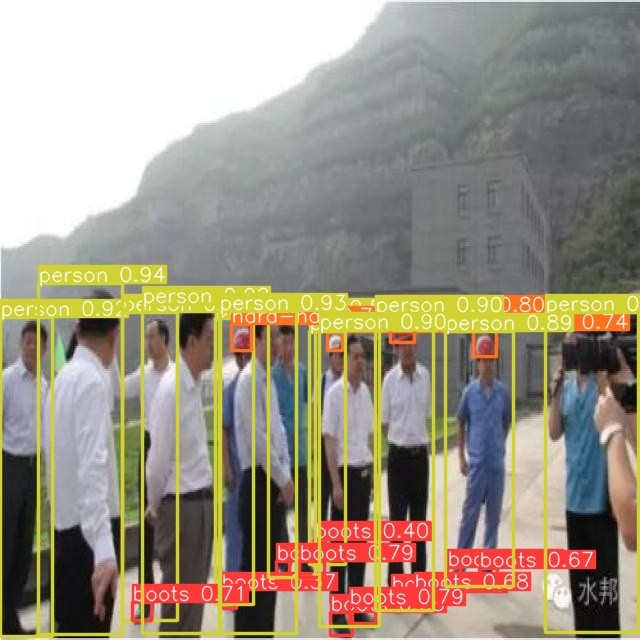

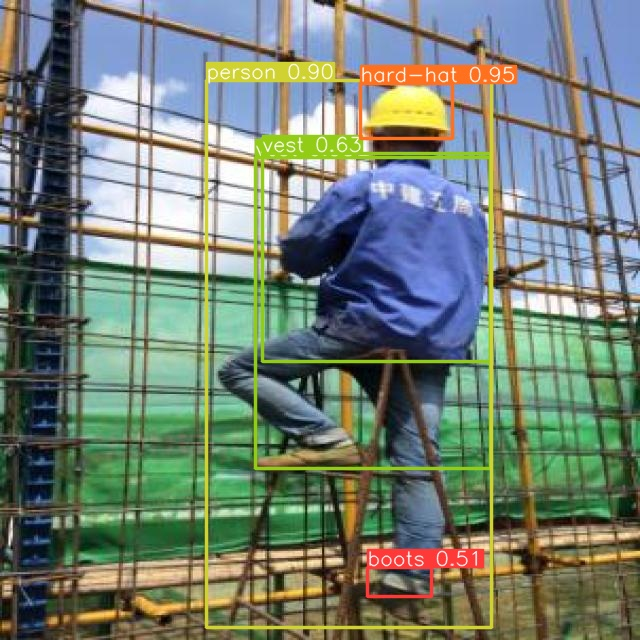

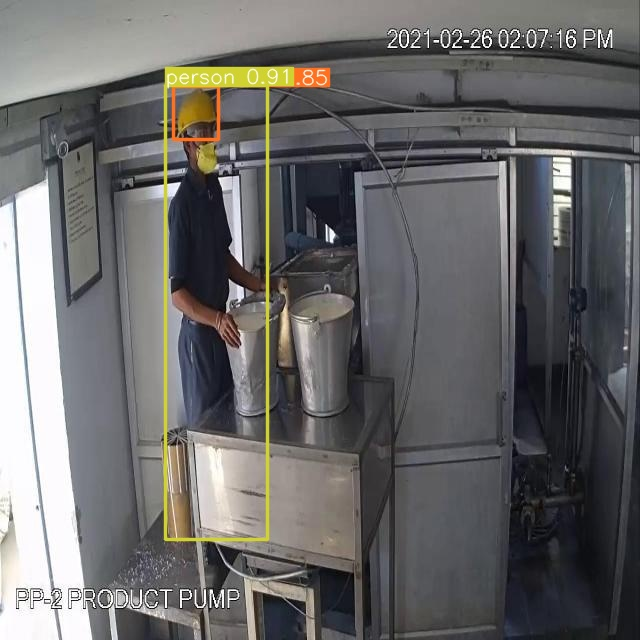

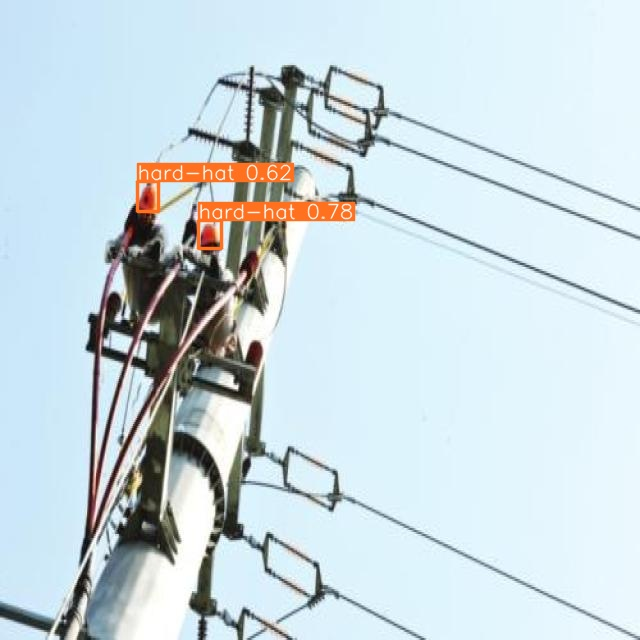

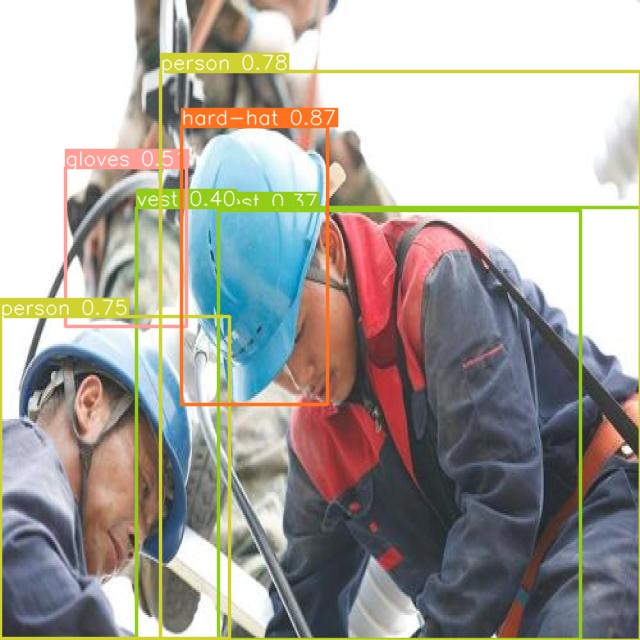

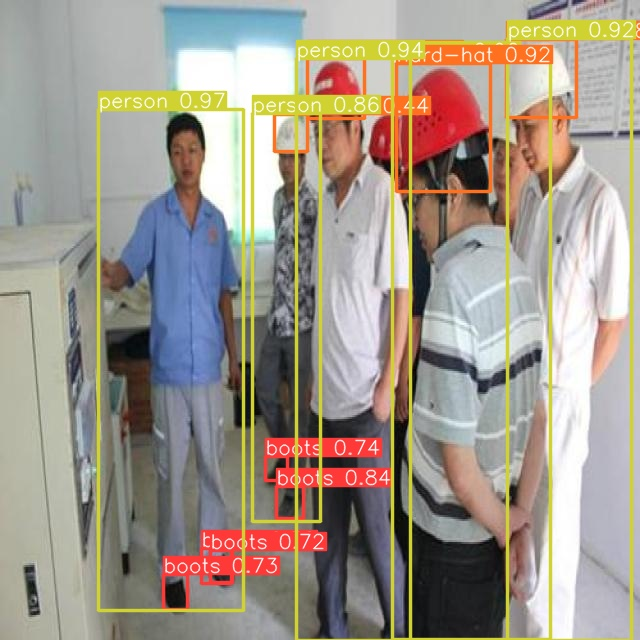

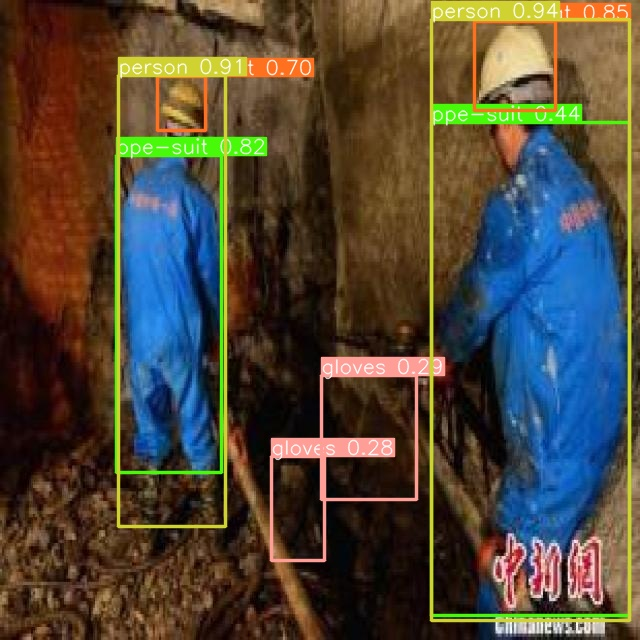

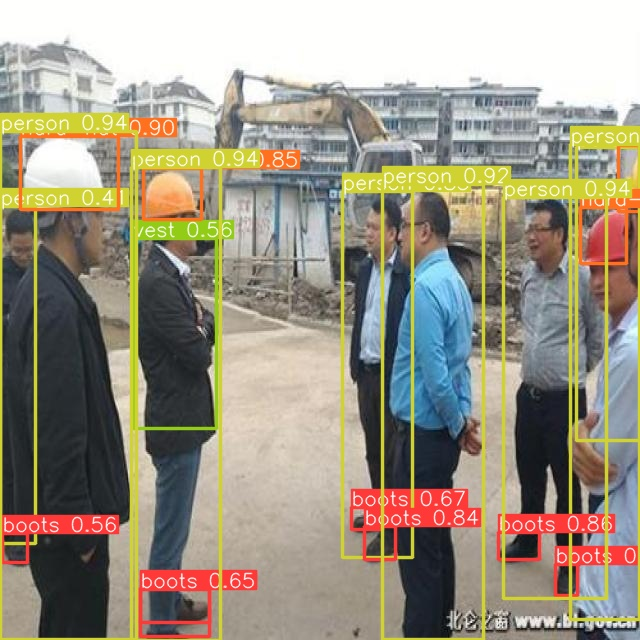

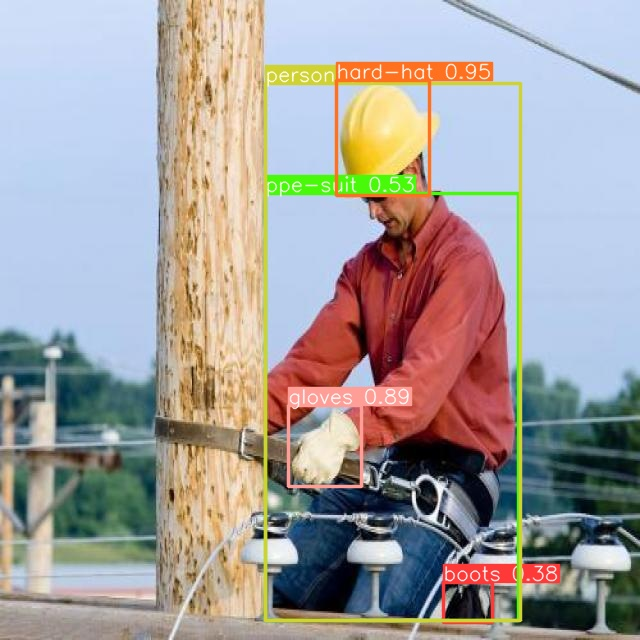

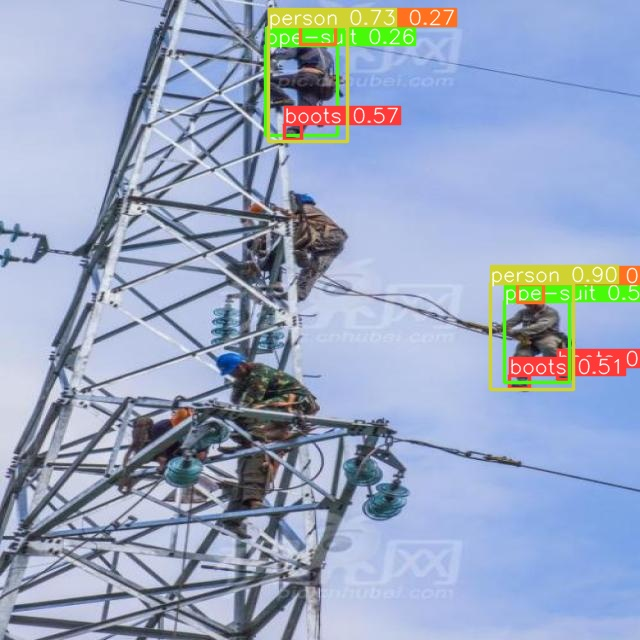

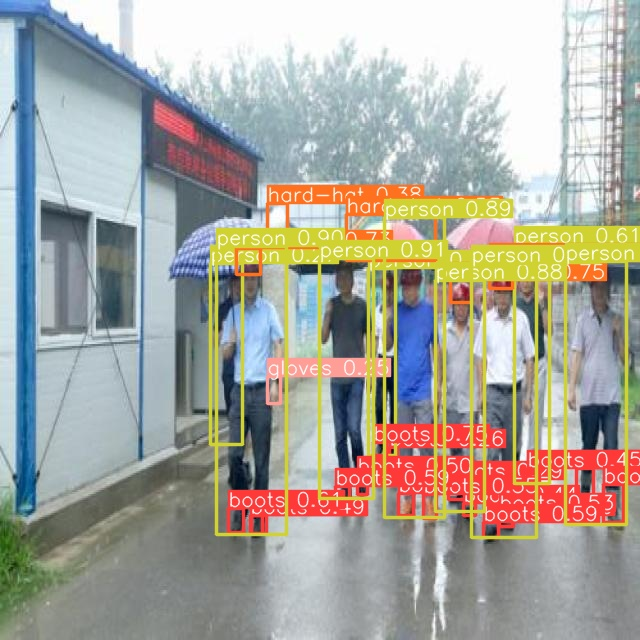

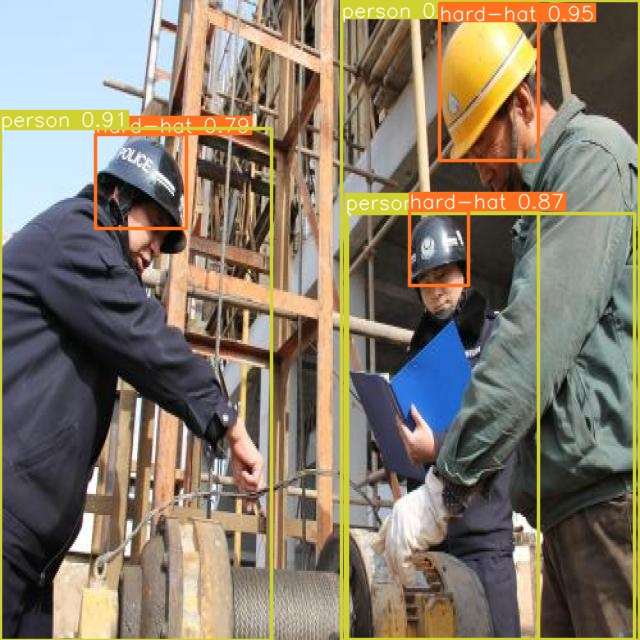

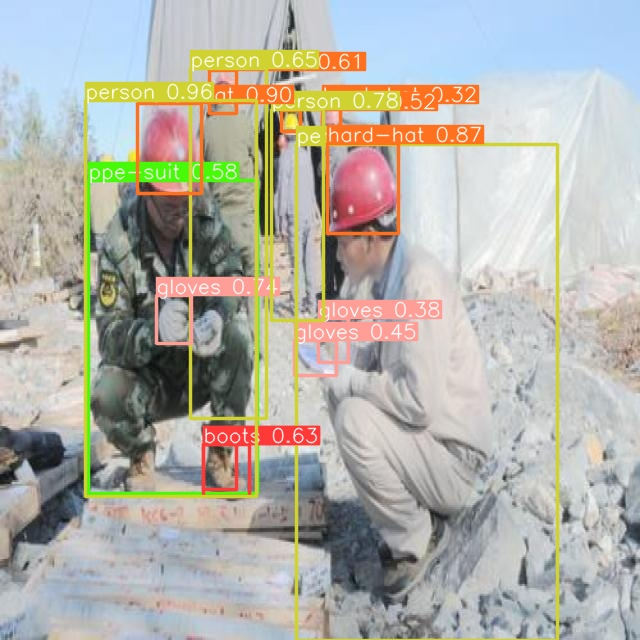

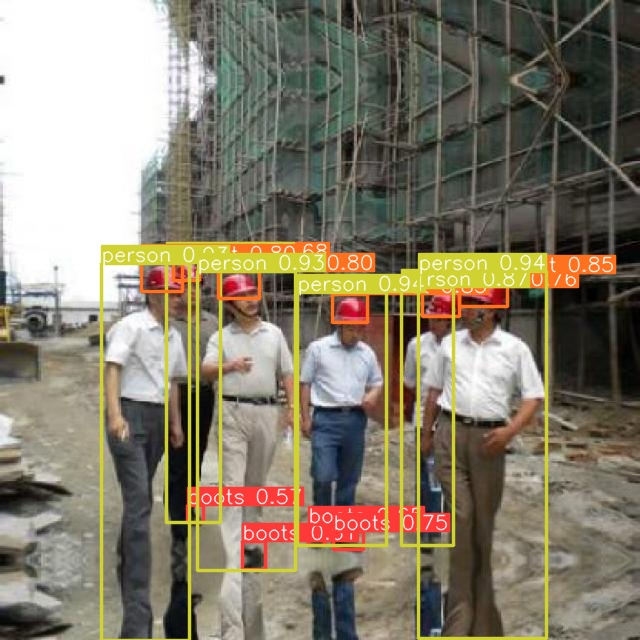

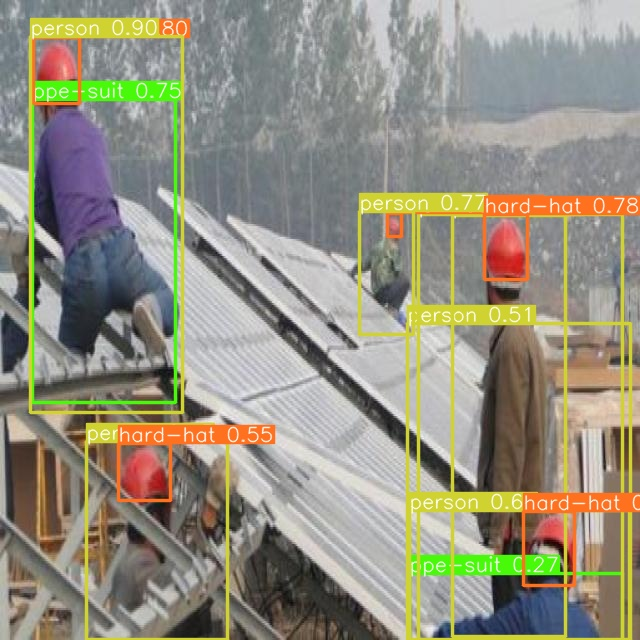

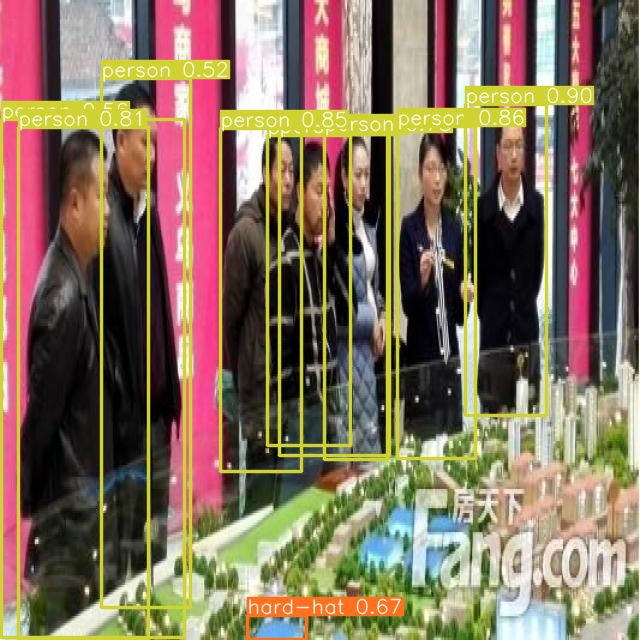

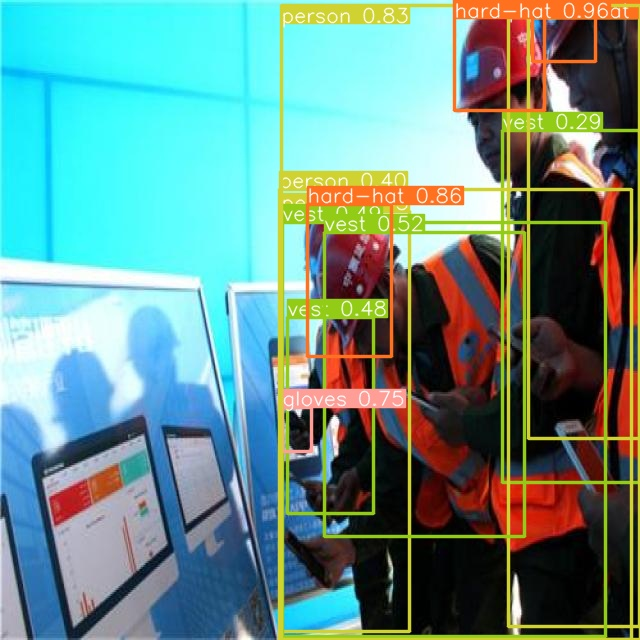

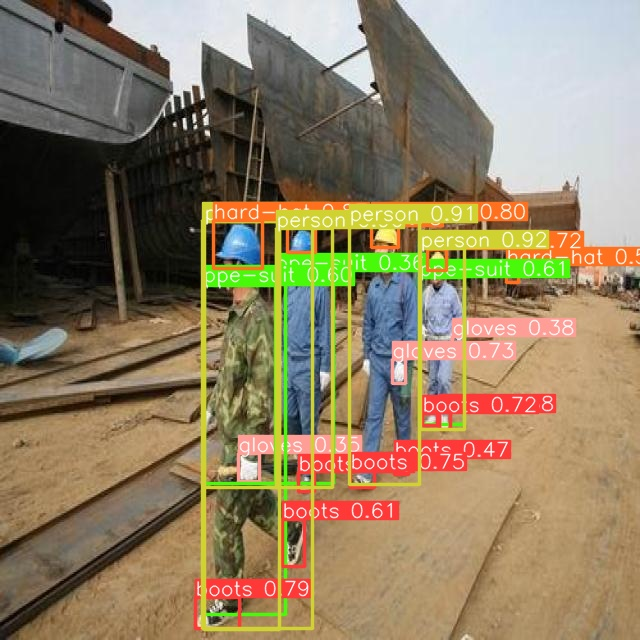

In [21]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/predict3/*.jpg'):
      display(Image(filename=image_path,height=600))
      print("\n")

In [22]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/whole_image.jpg data={dataset.location}/data.yaml


Ultralytics YOLOv8.2.23 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/whole_image.jpg: 640x640 4 bootss, 3 hard-hats, 3 persons, 37.0ms
Speed: 2.8ms preprocess, 37.0ms inference, 1265.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


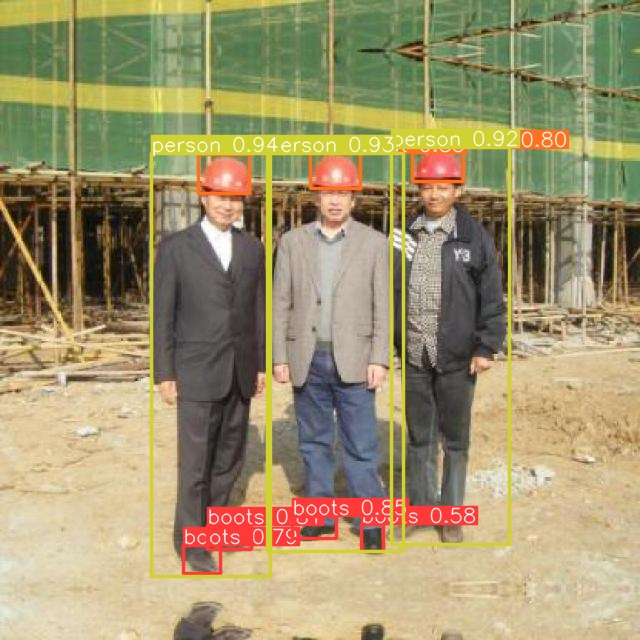

In [23]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/predict4/*.jpg'):
      display(Image(filename=image_path,height=600))
      print("\n")